In [1]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from dataloader import make_dataloaders
from model import ResNet
from model import ConvNet
from model import SE_ResNet
import time
import torch.nn.functional as F
import random

In [2]:
if torch.cuda.is_available():
    print("The code will run on GPU.")
else:
    print("The code will run on CPU.")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

The code will run on GPU.


In [9]:
#Define hyperparameters and model
batch_size = 128
model_choice = "ConvNet" #"SE_ResNet" "ResNet" "ConvNet"
n_features = 64
height = 128
width = 64
num_blocks = 0
droprate = 0.6
r = 16

np.random.seed(420)
random.seed(420)
torch.manual_seed(420)
torch.cuda.manual_seed(420)
torch.cuda.manual_seed_all(420)
torch.backends.cudnn.enabled = False
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

train_loader,test_loader = make_dataloaders(height, width, batch_size,transform=True,intensity=True,weighted=True)
iterable_loader = iter(train_loader)

np.random.seed(420)
random.seed(420)
torch.manual_seed(420)
torch.cuda.manual_seed(420)
torch.cuda.manual_seed_all(420)
torch.backends.cudnn.enabled = False
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

train_loader2,test_loader2 = make_dataloaders(height, width, batch_size,transform=True,intensity=True,weighted=True)
iterable_loader2 = iter(train_loader2)

In [10]:
data, target, scaler = next(iterable_loader)
data2, target2, scaler2 = next(iterable_loader2)

if (target == target2).numpy().sum() == batch_size:
    print("succes")

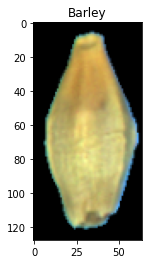

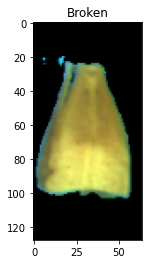

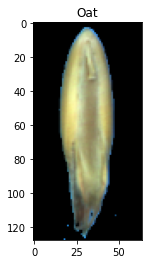

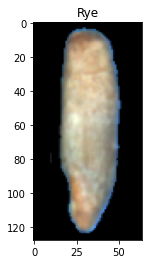

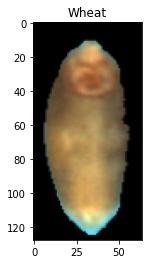

In [5]:
plt.imshow(np.moveaxis(data[np.where(target.numpy()==0)[0][0]].numpy(),0,2)[:,:,[4,2,1]])
plt.title("Barley")
plt.show()
plt.imshow(np.moveaxis(data[np.where(target.numpy()==1)[0][0]].numpy(),0,2)[:,:,[4,2,1]])
plt.title("Broken")
plt.show()
plt.imshow(np.moveaxis(data[np.where(target.numpy()==2)[0][0]].numpy(),0,2)[:,:,[4,2,1]])
plt.title("Oat")
plt.show()
plt.imshow(np.moveaxis(data[np.where(target.numpy()==3)[0][0]].numpy(),0,2)[:,:,[4,2,1]])
plt.title("Rye")
plt.show()
plt.imshow(np.moveaxis(data[np.where(target.numpy()==4)[0][0]].numpy(),0,2)[:,:,[4,2,1]])
plt.title("Wheat")
plt.show()

In [8]:
torch.manual_seed(420)
np.random.seed(420)
model = ConvNet(n_in=7, n_features=n_features, height=height, width=width, droprate=droprate).float()
model.to(device)
data,scaler = data.to(device),scaler.to(device)
with torch.no_grad():
    output1 = model(data,scaler)
    
torch.manual_seed(420)
np.random.seed(420)
model = ConvNet(n_in=7, n_features=n_features, height=height, width=width, droprate=droprate).float()
model.to(device)
data,scaler = data.to(device),scaler.to(device)
with torch.no_grad():
    output2 = model(data,scaler)
    
if (output1 == output2).cpu().numpy().sum() == batch_size*5:
    print("Networks are initialized the same")

Networks are initialized the same
